<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p>

----

<table>
  <tr>
    <th>Nama Mata Kuliah </th>
    <td>Pembelajaran Mesin / Mechine Learning</td>
  </tr>
  <tr>
    <th>Topik</th>
    <td>UTS | Pertemuan 8 | Segmentasi Gambar menggunakan K means</td>
  </tr>
  <tr>
    <th>Dosen</th>
    <td>Muhammad Afif Hendawan, S.Kom., M.T. </td>
  </tr>
  <tr>
    <th>Kelompok</th>
    <td>Kelompok 3</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
    - Alvian Nur Firdaus<p>
    - Devi Andini Febrianti<p>
    - Febrian Dhani Ritonga<p>
    - Naresh Pratista<p>
    - Zahra Annisa Wahono<p></td>
  </tr>
  <tr>
    <th>Hasil Pengerjaan</th>
    <td><p>
    Devi Andini Febrianti<p>
</td>
  </tr>
</table>

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Plat 1

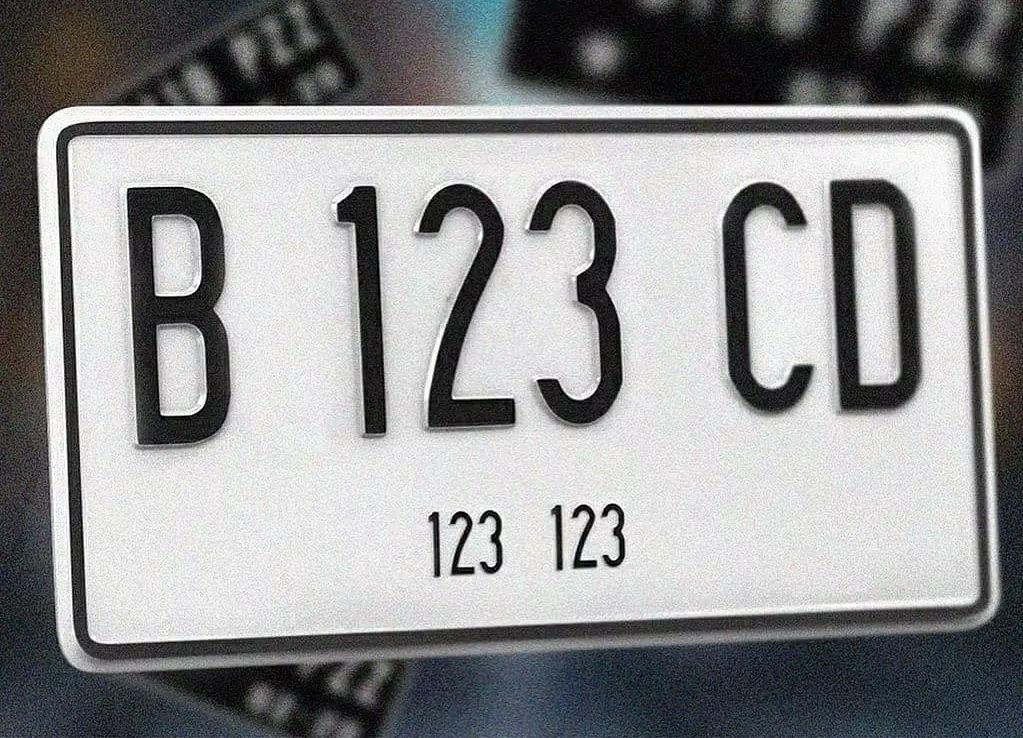

In [ ]:
plat = cv2.imread('/content/drive/MyDrive/plat1.jpg')
cv2_imshow(plat)

In [ ]:
#kode mencetak tinggi, lebar, dan jumlah saluran warna (channels) dari gambar
t, l, ch= plat.shape
print(t)
print(l)
print(ch)

738
1023
3


In [ ]:
# Normalisasi gambar mengubah nilai piksel antara 0 dan 1
data = plat / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(t* l, ch) #mengubah bentuk array agar menjadi bentuk 2 dimensi
data.shape

(754974, 3)

In [ ]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu (Plotting data)
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

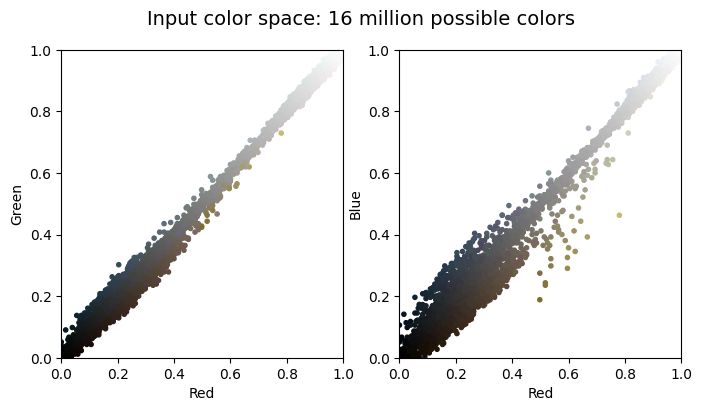

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


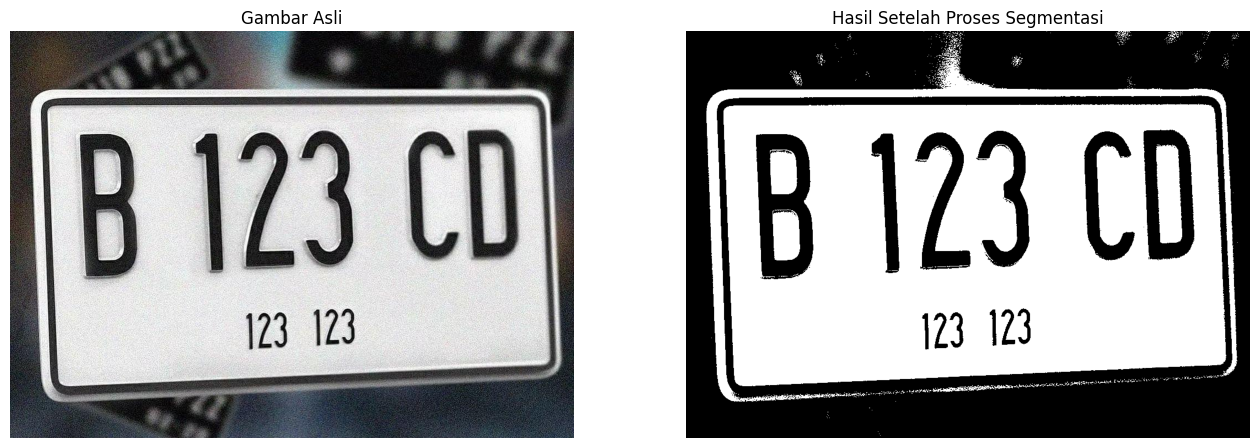

In [ ]:
#Segmentasi citra menggunakan algoritma K-Means
from sklearn.cluster import KMeans

# Citra 2 dimensi
jumlah_k = 2
kmeans = KMeans(n_clusters=jumlah_k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_plat = labels.reshape(t, l)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(plat, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_plat, cmap='gray')
plt.title('Hasil Setelah Proses Segmentasi')
plt.axis('off')

plt.show()

# Plat 2

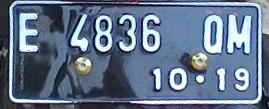

In [ ]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/plat2.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue

In [ ]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

109
269
3


In [ ]:
data = img2 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(29321, 3)

In [ ]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

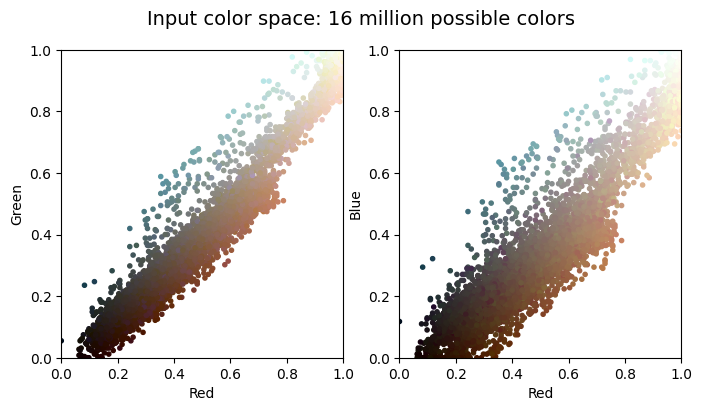

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


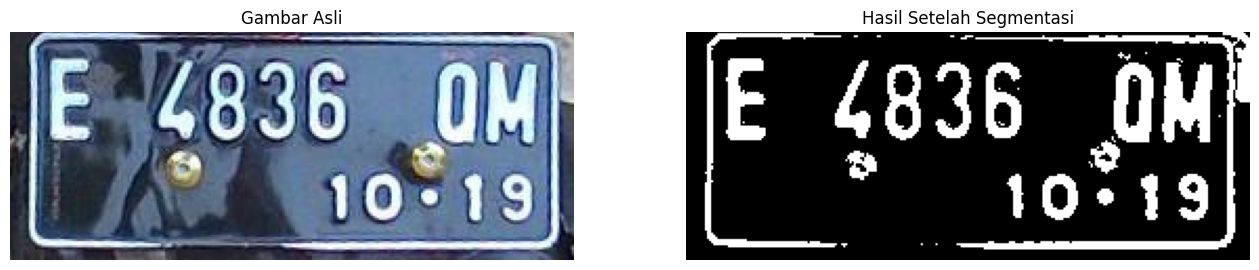

In [ ]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

# Plat 3

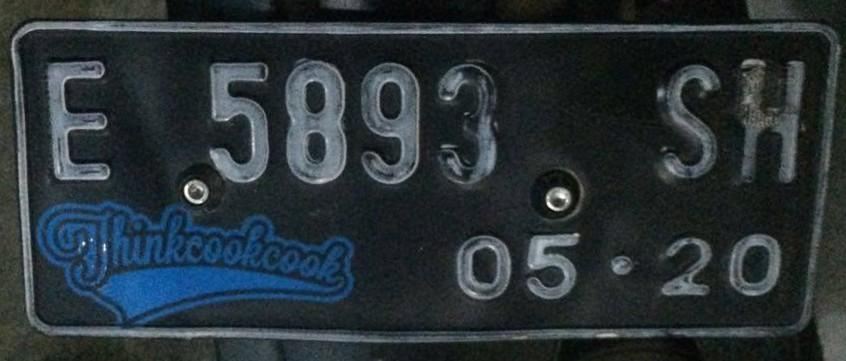

In [ ]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/plat3.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue

In [ ]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img2.shape
print(h)
print(w)
print(ch)

361
846
3


In [ ]:
data = img3 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(305406, 3)

In [ ]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

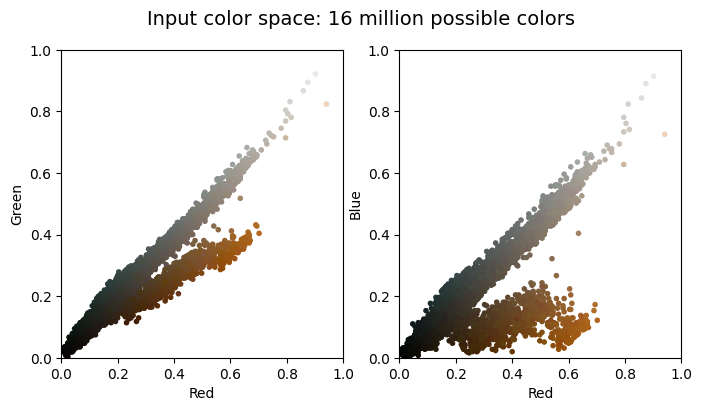

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


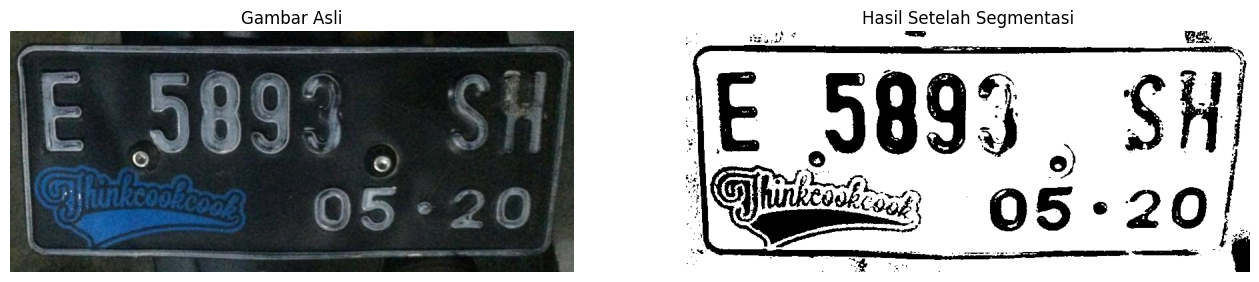

In [ ]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

# Plat 4

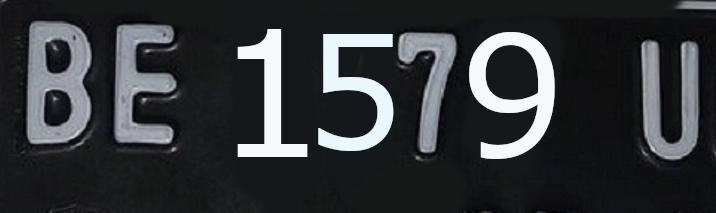

In [ ]:
# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/plat4.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4) # khusus google colab karena ada issue

In [ ]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img4.shape
print(h)
print(w)
print(ch)

213
716
3


In [ ]:
data = img4 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(152508, 3)

In [ ]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

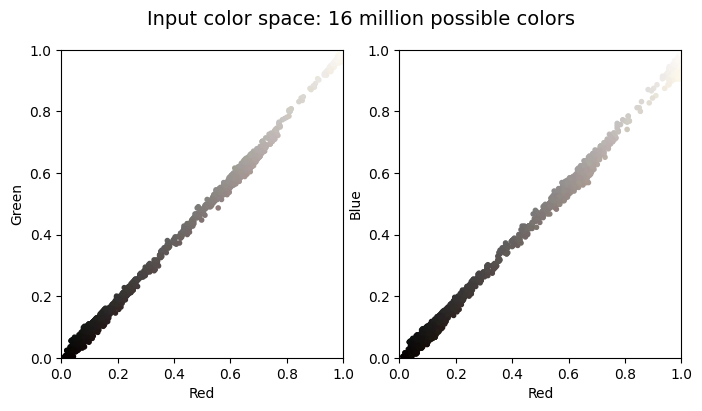

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


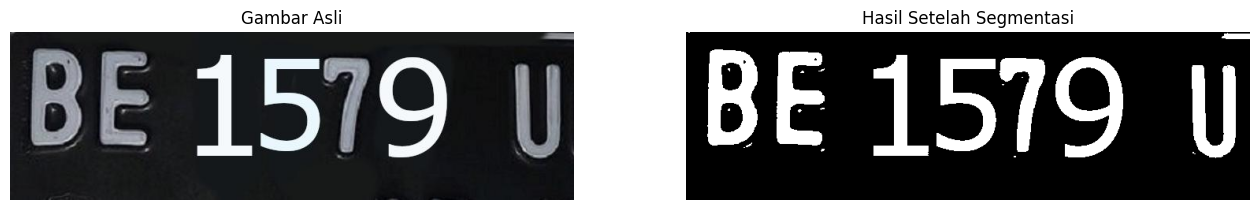

In [ ]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img4, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()

# Plat 5

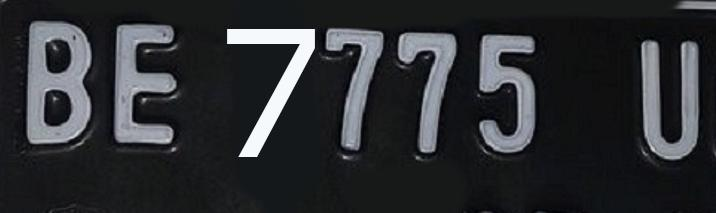

In [ ]:
# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/plat5.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img5) # khusus google colab karena ada issue

In [ ]:
#kode mencetak tinggi (height), lebar (width), dan jumlah saluran warna (channels) dari gambar
h, w, ch= img5.shape
print(h)
print(w)
print(ch)

213
716
3


In [ ]:
data = img5 / 255.0 # normalisasi gambar dengan membagi setiap nilai piksel dalam gambar (img) dengan 255.0.
data = data.reshape(h * w, ch) #mengubah bentuk array
data.shape

(152508, 3)

In [ ]:
#menggambarkan distribusi piksel dalam citra berdasarkan warna tertentu
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


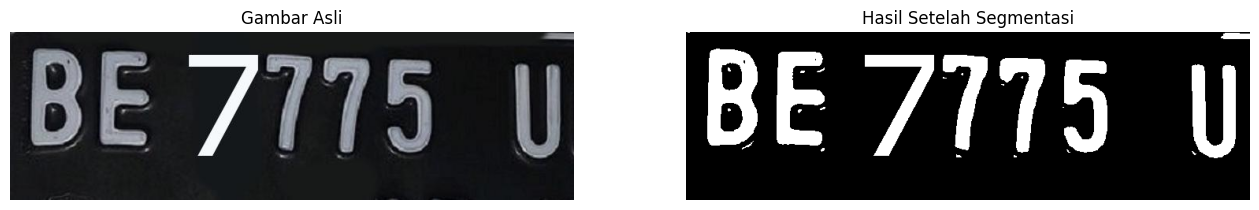

In [ ]:
from sklearn.cluster import KMeans

# Lakukan segmentasi pada gambar dengan K-Means
k = 2  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=k)
kmeans.fit(data)

# Dapatkan label cluster untuk setiap piksel
labels = kmeans.labels_

# Reshape label menjadi bentuk asli gambar
segmented_img = labels.reshape(h, w)

# Tampilkan perbandingan gambar sebelum dan sesudah segmentasi
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img5, cv2.COLOR_BGR2RGB))
plt.title('Gambar Asli')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap='gray')
plt.title('Hasil Setelah Segmentasi')
plt.axis('off')

plt.show()